In [1]:
import numpy as np
import csv
import igl
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import geopandas as gpd
from shapely.ops import triangulate
import meshio
import os


(446789, 2)


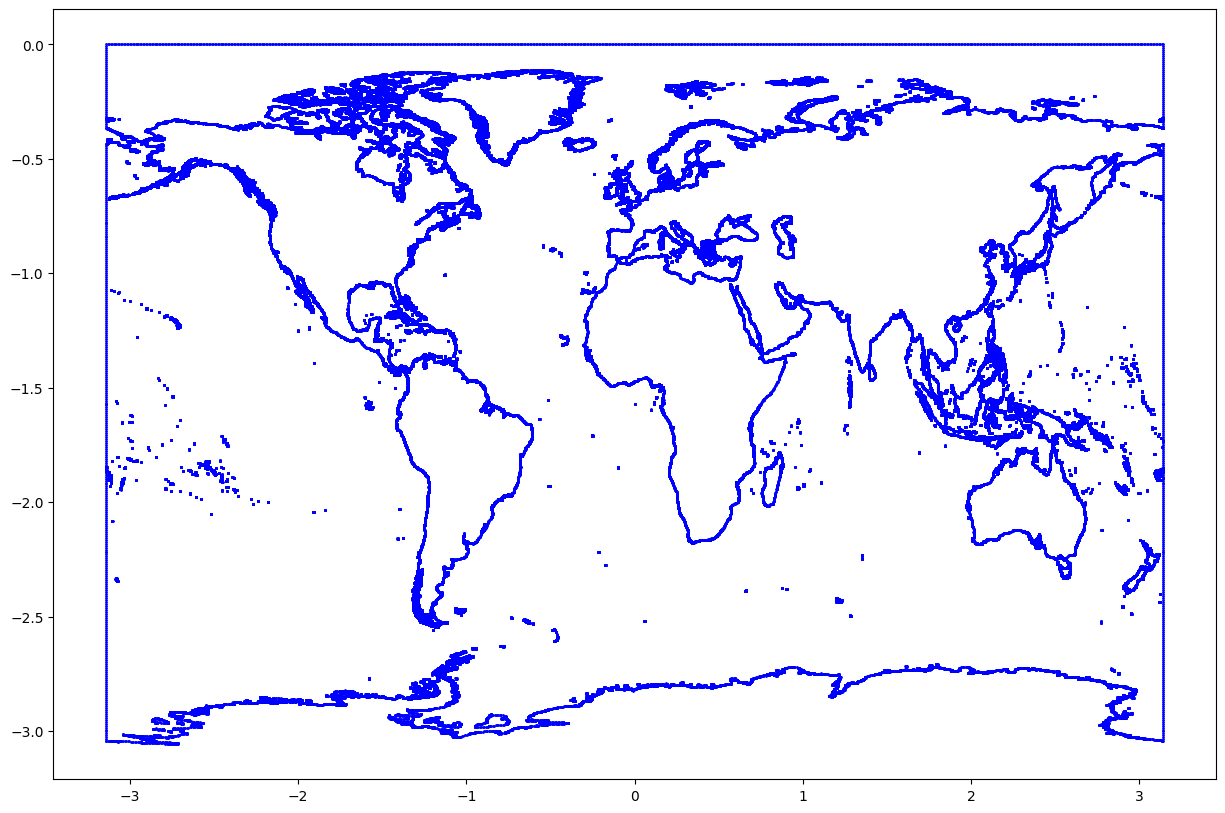

In [2]:
current_dir = os.getcwd()
path = os.path.join(current_dir, "points_oceans.npy")

data = np.load(path)
print(data.shape)

# Plotting the points
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(data[:,0], -data[:,1], s=1, c='b', marker='o')
plt.show()

In [8]:
data = np.load(path)

# Filtering the egdes
filtered_data = data[(data[:,0] < 3.141) & (data[:,0] > -3.141) & (data[:,1] > 8.8817*10**(-16))]
filtered_data = filtered_data[::10] # Taking every 10th point
print(filtered_data.shape)
# Plotting the points
# filtered_data = filtered_data[0:400000,]
px.scatter(x=filtered_data[:,0], y=-filtered_data[:,1])

(44534, 2)


In [4]:
current_dir = os.getcwd()
path2 = os.path.join(current_dir, "cartesian_coords_points_oceans.npz")

data2 = np.load(path2)
x = data2['arr_0']
y = data2['arr_1']

print(x.shape)
print(y.shape)

(446789,)
(446789,)


In [5]:
def calculate_distance(point1, point2, other_points):
    # Calculate the Euclidean distance between point1 and point2
    distance = math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

    # Check for collision with other points
    for other_point in other_points:
        dx = point2[0] - point1[0]
        dy = point2[1] - point1[1]
        dpx = other_point[0] - point1[0]
        dpy = other_point[1] - point1[1]

        dot_product = dx * dpx + dy * dpy
        if dot_product > 0:
            squared_length = dx**2 + dy**2
            if dot_product < squared_length:
                distance = float('inf')
                break

    return distance